In [3]:
import os
import math
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.bn2roc import showROC_PR

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import pandas as pd

In [ ]:
import pyAgrum.skbn

In [4]:
traindf=pandas.read_csv('res/titanic/train.csv')                       

testdf=pandas.merge(pandas.read_csv('res/titanic/test.csv'),
                   pandas.read_csv('res/titanic/gender_submission.csv'),
                   on="PassengerId")

In [6]:
traindf.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [8]:
for k in traindf.keys():
    print('{0}: {1}'.format(k, len(traindf[k].unique())))

PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 89
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 148
Embarked: 4


In [10]:
for k in traindf.keys():
    if len(traindf[k].unique())<=15:
        print(k)

Survived
Pclass
Sex
SibSp
Parch
Embarked


In [34]:
testdf=pandas.merge(pandas.read_csv('res/titanic/test.csv'),
                    pandas.read_csv('res/titanic/gender_submission.csv'),
                    on="PassengerId")


def forAge(row):
    try:
        age = float(row['Age'])
        if age < 1:
            #return '[0;1['
            return 'baby'
            #return 0
        elif age < 6:
            #return '[1;6['
            return 'toddler'
            #return 1
        elif age < 12:
            #return '[6;12['
            return 'kid'
            #return 2
        elif age < 21:
            #return '[12;21['
            return 'teen'
            #return 3
        elif age < 80:
            #return '[21;80['
            return 'adult'
            #return 4
        else:
            #return '[80;200]'
            return 'old'
            #return 5
    except ValueError:
        return np.nan
    
def forBoolean(row, col):
    try:
        val = int(row[col])
        if row[col] >= 1:
            return "True"
        else:
            return "False"
    except ValueError:
        return "False"
    
def forGender(row):
    if row['Sex'] == "male":
        return "Male"
        #return 0
    else:
        return "Female"
        #return 1

def forEmbarked(row):
    val = row['Embarked']
    if val == "S":
        return 0
    elif val == "C":
        return 1
    elif val == "Q":
        return 2
        

testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [58]:
def pretreat(df):
    if 'Survived' in df.columns:
        df['Survived'] = df.apply(lambda row: forBoolean(row, 'Survived'), axis=1)
    df['Age'] = df.apply(forAge, axis=1)
    df['SibSp'] = df.apply(lambda row: forBoolean(row, 'SibSp'), axis=1)
    df['Parch'] = df.apply(lambda row: forBoolean(row, 'Parch'), axis=1)
    df['Sex'] = df.apply(forGender, axis=1)
    droped_cols = [col for col in ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'] if col in df.columns]
    df = df.drop(droped_cols, axis=1)
    df = df.rename(index=str, columns={'Sex': 'Gender', 'SibSp': 'Siblings', 'Parch': 'Parents'})
    df.dropna(inplace=True)
    return df

traindf = pandas.read_csv('res/titanic/train.csv')
testdf  = pandas.merge(pandas.read_csv('res/titanic/test.csv'),
                       pandas.read_csv('res/titanic/gender_submission.csv'),
                       on="PassengerId")

traindf = pretreat(traindf)
testdf = pretreat(testdf)

In [57]:
import csv
traindf.to_csv('res/titanic/post_train.csv', index=False)
testdf.to_csv('res/titanic/post_test.csv', index=False)

In [29]:
learner=gum.BNLearner("res/titanic/post_train.csv")

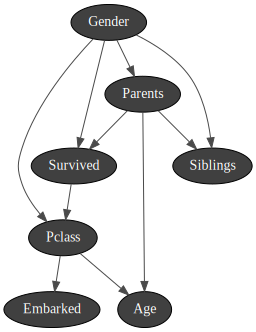

In [30]:
learner.names()
learner.useLocalSearchWithTabuList()
bn=learner.learnBN()
gnb.showBN(bn)